In [2]:
# Mounting the Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/email_dataset


/content/drive/MyDrive/email_dataset


In [4]:
import numpy as np 
import pandas as pd 
import plotly 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pd.options.plotting.backend = "plotly"
import os
import regex
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt
import nltk
nltk.download('omw-1.4')
from wordcloud import WordCloud
from nltk.corpus import stopwords, words
from nltk.tokenize import WordPunctTokenizer, word_tokenize
from string import punctuation
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [5]:
from os import listdir
from os.path import isfile, join
import os
import pandas as pd

# Declaring the path of folder which contains dataset
PATH = "/content/drive/MyDrive/email_dataset"

folders = os.listdir(PATH)
data = []

print("Following Folders are there---")

# Extracting the files from different folders and creating our dataframe
for email_folder in folders:
    print(email_folder)
    email_file = os.listdir(os.path.join(PATH, email_folder))
    files=[]
    for i  in email_file:
       if(isfile(join(join(PATH,email_folder),i))):
          files.append(i)

    for email_file in files:
            with open(os.path.join(PATH, email_folder,email_file),'rb') as f:
                email = f.read().decode('ISO-8859-1')
                data.append([email_file.split(".")[0], email_folder, email])
                f.close()
       
# Creating the dataframe
df = pd.DataFrame(data, columns=['ID', 'Category', 'Content'])
df.to_csv("/content/combine.csv", index = False)
df = pd.read_csv("/content/combine.csv")

print("The dataframe with all email files category wise is as follows:--\n",df)

Following Folders are there---
Crime
Entertainment
Politics
Science
The dataframe with all email files category wise is as follows:--
          ID Category                                            Content
0     15265    Crime  Originator: rdippold@qualcom.qualcomm.com\r\nN...
1     15236    Crime  \r\n\r\nMy thoughts on why the algorithm is se...
2     15237    Crime  \r\nIf there is anyone attending the ISSA conf...
3     15254    Crime  Sender: faqserv@GZA.COM\r\nApproved: news-answ...
4     15287    Crime  \r\nIn article <betel.734997645@camelot> betel...
...     ...      ...                                                ...
9157  15566  Science  \r\nkubo@zariski.harvard.edu (Tal Kubo) writes...
9158  15373  Science  \r\n\r\ndwight tuinstra posts a very interesti...
9159  15569  Science  \r\nWhat is the status of cruptology for priva...
9160  15290  Science  \r\nI saw this article posted in a local newsg...
9161  15392  Science  \r\nIn article <bontchev.734981805@fbihh> bont...



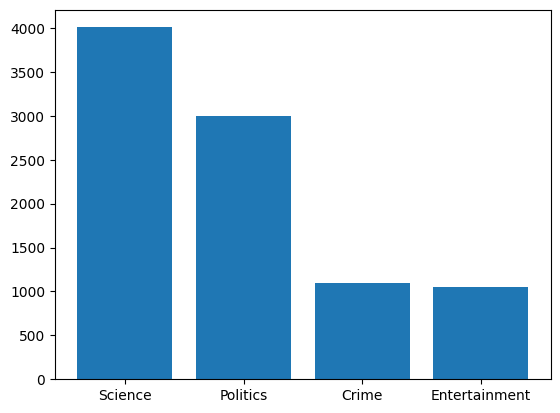

In [6]:
# Visualisation of counts of text files from different categories
data_file=pd.read_csv("/content/combine.csv")
category_count=data_file["Category"].value_counts()
category_count=dict(category_count)
plt.bar(category_count.keys(),category_count.values())
plt.show()

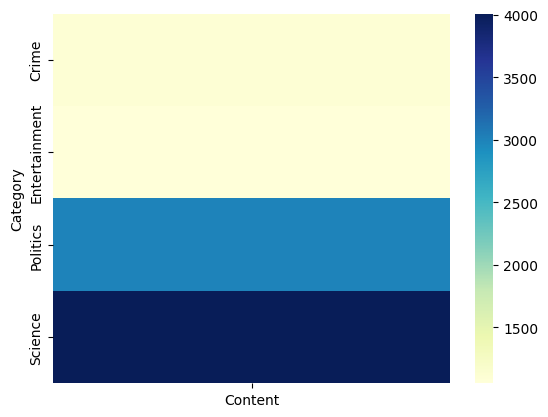

In [7]:
import seaborn as sns
pivot = pd.pivot_table(data_file, values='Content', index=['Category'], columns=[], aggfunc=len)
sns.heatmap(pivot, cmap='YlGnBu')
plt.show()


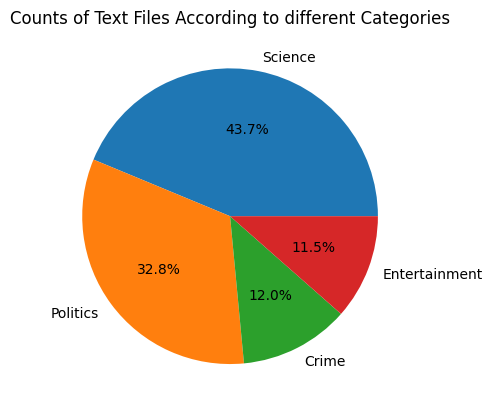

In [8]:
# Creating the pie chart for visualisation of counts

import pandas as pd
import matplotlib.pyplot as plt

data_file = df;

count_of_category = data_file["Category"].value_counts()

plt.pie(count_of_category.values, labels=count_of_category.index, autopct='%1.1f%%')

plt.title('Counts of Text Files According to different Categories')

plt.show()


In [34]:
# Data Cleaning
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import re

en_stopwords = set(stopwords.words('english'))
word_lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Remove non-alphabetic characters, extra whitespace, and newlines
    text= str(text);
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords
    words = [w for w in words if not w in en_stopwords]

    # Lemmatize the words
    words = [word_lemmatizer.lemmatize(w) for w in words]

    # Join the words back into a string
    cleaned_text = ' '.join(words)
    return cleaned_text

# Tokenizing
def tokenize_content(content):
    return clean_text(content)

df['cleaned_content'] = df['Content'].apply(tokenize_content)

df.style.hide_index()
print(df)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


          ID  Category                                            Content  \
2153  179064  Politics  \r\n>In article <C5sBJ5.3Kp@apollo.hp.com> nel...   
2154   76507  Politics  \r\nIn article <1993Apr18.183148.4802@das.harv...   
2155   53347  Politics  \r\nIn article <1993Apr5.155733.114@pasadena-d...   
2156   76205  Politics  \r\nDanny Rubenstein, an Israeli journalist, w...   
2157  179057  Politics  \r\nToday marks the 78th anniversary of the Ar...   
...      ...       ...                                                ...   
9148   60205   Science  \r\n\r\n\tThanks for the Update.\r\n\r\n\t\t\t...   
9149   61058   Science  Message-ID: <1r6aqr$dnv@access.digex.net>\r\nR...   
9150   58049   Science  \r\nIn article <1pka0uINNnqa@mojo.eng.umd.edu>...   
9151   53751   Science  \r\nIn article <1qngqlINNnp8@shelley.u.washing...   
9152   58865   Science  \r\nI'm told that corn allergy is fairly commo...   

                                        cleaned_content  
2153  article csb

<ipython-input-34-f910362da190>:43: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df.style.hide_index()


In [10]:
data_frame_cleaned = df;
data_frame_cleaned = data_frame_cleaned.drop("Content",axis='columns');
print(data_frame_cleaned);

         ID Category                                    cleaned_content
0     15265    Crime  originator rdippoldqualcomqualcommcom nntppost...
1     15236    Crime  thought algorithm secret chip regretably likel...
2     15237    Crime  anyone attending issa conference arlington va ...
3     15254    Crime  sender faqservgzacom approved newsanswersreque...
4     15287    Crime  article betelcamelot betelcamelotbradleyedu ro...
...     ...      ...                                                ...
9157  15566  Science  kubozariskiharvardedu tal kubo writes eff asso...
9158  15373  Science  dwight tuinstra post interesting message comme...
9159  15569  Science  status cruptology private citizen throughout w...
9160  15290  Science  saw article posted local newsgroup havent seen...
9161  15392  Science  article bontchevfbihh bontchevfbihhinformatiku...

[9162 rows x 3 columns]


In [11]:
# Joining the text files of one particular category for word cloud further

def join_content(l):
 ans=''
 for i in l:
   ans = ans+ ' '+ i
 return ans
crime_text = df[df['Category'] == 'Crime']['cleaned_content'].values
crime_text = join_content(crime_text)

entertainment_text = df[df['Category'] == 'Entertainment']['cleaned_content'].values
entertainment_text = join_content(entertainment_text)

politics_text = df[df['Category'] == 'Politics']['cleaned_content'].values
politics_text = join_content(politics_text)

science_text = df[df['Category'] == 'Science']['cleaned_content'].values

science_text = join_content(science_text)


In [12]:
# Creating the world clouds 
def wordcloud(content):
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='black',
                    min_font_size = 10).generate(content)
    return wordcloud

from wordcloud import WordCloud, STOPWORDS

#Defined a class called wordcloud1 to get a information about
#frequency of each word in the texts of each category
def wordcloud1(content):
    wordcloud1 = WordCloud(width = 800, height = 800,
                    background_color ='black',
                    stopwords = STOPWORDS,
                    min_font_size = 10)
    wordcloud1.generate_from_text(content)
    
    # Get word frequencies as a dictionary
    word_freq = wordcloud1.process_text(content)
    # Sort words by frequency
    sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    return sorted_words
 



Dictionary of counts of different words for science category
[('one', 2570), ('use', 1468), ('people', 1142), ('time', 1055), ('may', 1049), ('think', 1017), ('u', 945), ('system', 945), ('used', 895), ('even', 850), ('make', 832), ('know', 808), ('need', 800), ('work', 790), ('new', 782), ('problem', 779), ('well', 758), ('much', 753), ('say', 743), ('thing', 742), ('good', 739), ('see', 719), ('way', 712), ('information', 671), ('many', 650), ('something', 639), ('write', 633), ('right', 610), ('first', 608), ('using', 603), ('dont', 592), ('article', 589), ('key', 585), ('case', 572), ('government', 563), ('probably', 557), ('program', 556), ('go', 553), ('reference', 547), ('might', 547), ('still', 545), ('take', 535), ('two', 528), ('data', 525), ('db b', 512), ('seem', 510), ('b db', 510), ('part', 492), ('really', 470), ('etc', 467), ('look', 465), ('mean', 464), ('point', 456), ('anyone', 453), ('said', 451), ('writes article', 445), ('idea', 443), ('lot', 442), ('going', 440),

(-0.5, 799.5, 799.5, -0.5)

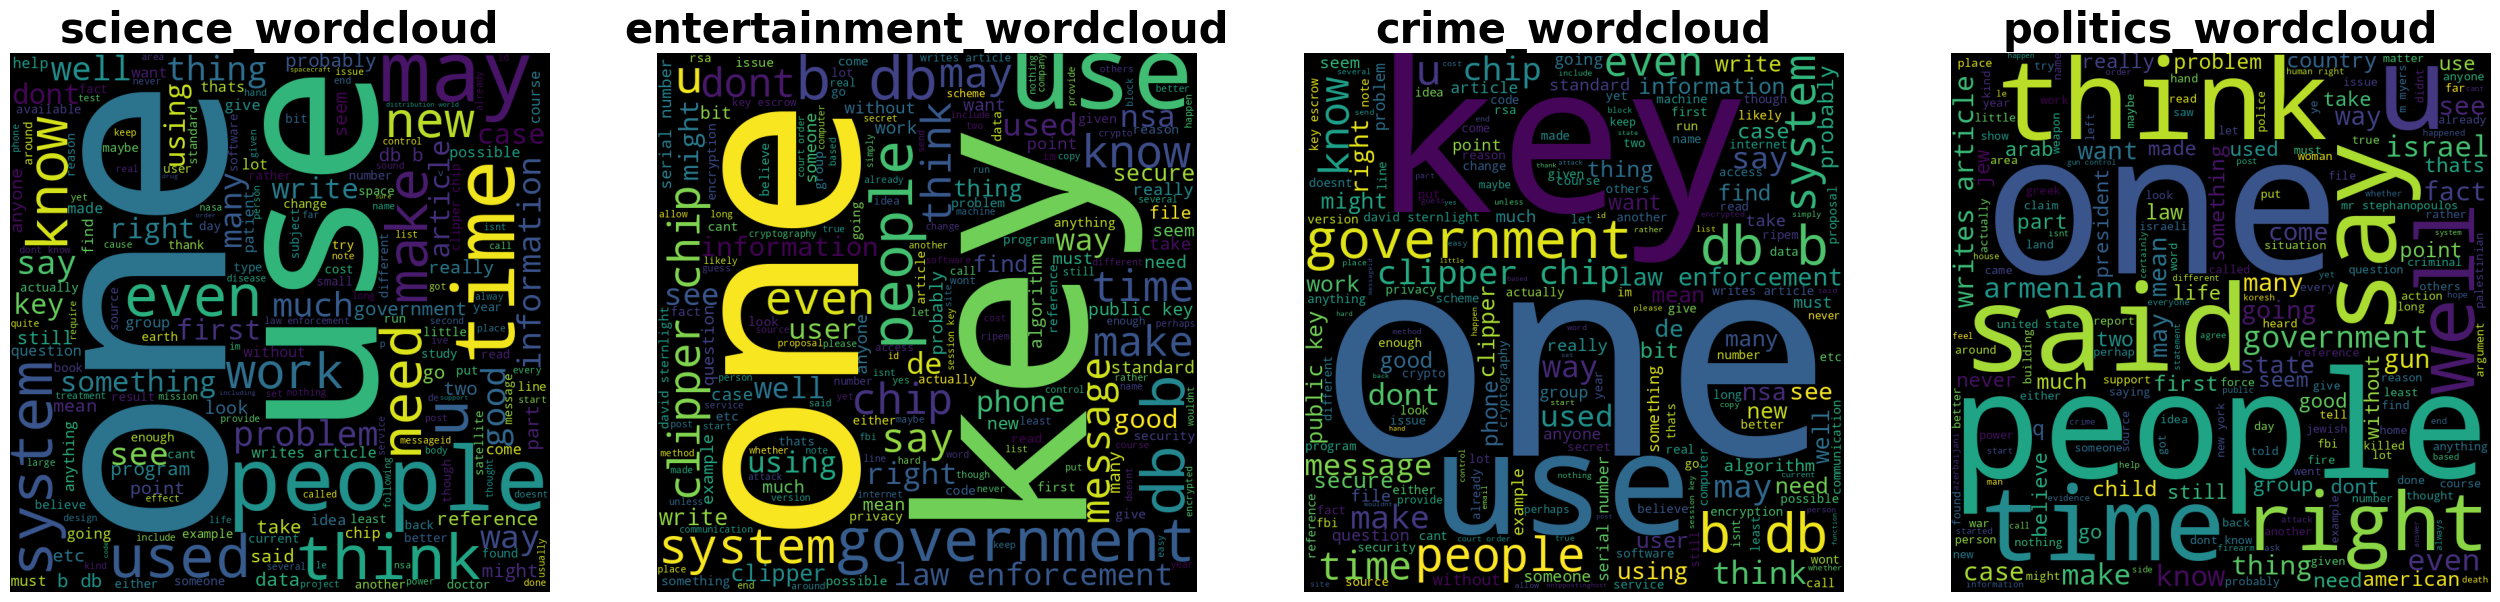

In [13]:
fig, axos = plt.subplots(1, 4, figsize= (32,16), facecolor= None)

# plot the WordCloud image  
science_wordcloud = wordcloud(science_text)
science_wordcloud1 = wordcloud1(science_text)
print("Dictionary of counts of different words for science category")
print(science_wordcloud1)
print( "\n")

crime_wordcloud = wordcloud(crime_text)
crime_wordcloud1 = wordcloud1(crime_text)
print("Dictionary of counts of different words for crime category")
print(crime_wordcloud1)
print( "\n")

entertainment_wordcloud = wordcloud(entertainment_text)
entertainment_wordcloud1 = wordcloud1(entertainment_text)
print("Dictionary of counts of different words for entertainment category")
print(entertainment_wordcloud1)
print( "\n")

politics_wordcloud = wordcloud(politics_text)
politics_wordcloud1 = wordcloud1(politics_text)
print("Dictionary of counts of different words for politics category")
print(politics_wordcloud1)
print( "\n")

axos[0].imshow(science_wordcloud)
axos[0].set_title('science_wordcloud', fontweight="bold", size=30)
axos[0].axis("off")

axos[2].imshow(crime_wordcloud)
axos[2].set_title('crime_wordcloud', fontweight="bold", size=30)
axos[2].axis("off")

axos[1].imshow(entertainment_wordcloud)
axos[1].set_title('entertainment_wordcloud', fontweight="bold", size=30)
axos[1].axis("off")

axos[3].imshow(politics_wordcloud)
axos[3].set_title('politics_wordcloud', fontweight="bold", size=30)
axos[3].axis("off")


After deletion of duplicates-


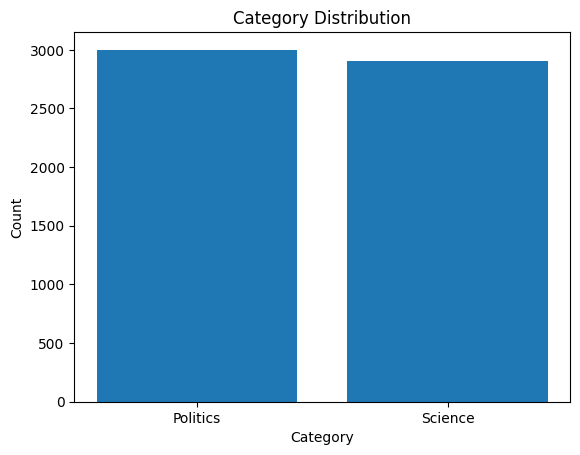

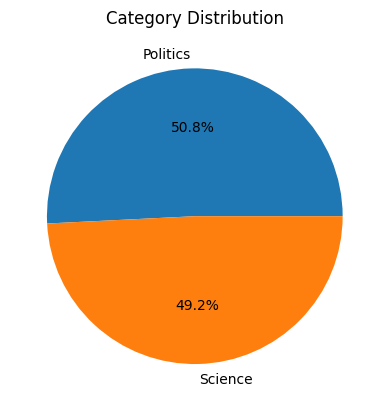

In [14]:
# Dropping the Duplicates
import matplotlib.pyplot as plt
df.drop_duplicates(subset=['ID', 'Content'], inplace=True, keep=False)
after_count=df['Category'].value_counts()

print("After deletion of duplicates-")
plt.bar(after_count.index, after_count.values)
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()
plt.show()

plt.pie(after_count.values, labels=after_count.index, autopct='%1.1f%%')
plt.title('Category Distribution')
plt.show()

(-0.5, 799.5, 799.5, -0.5)

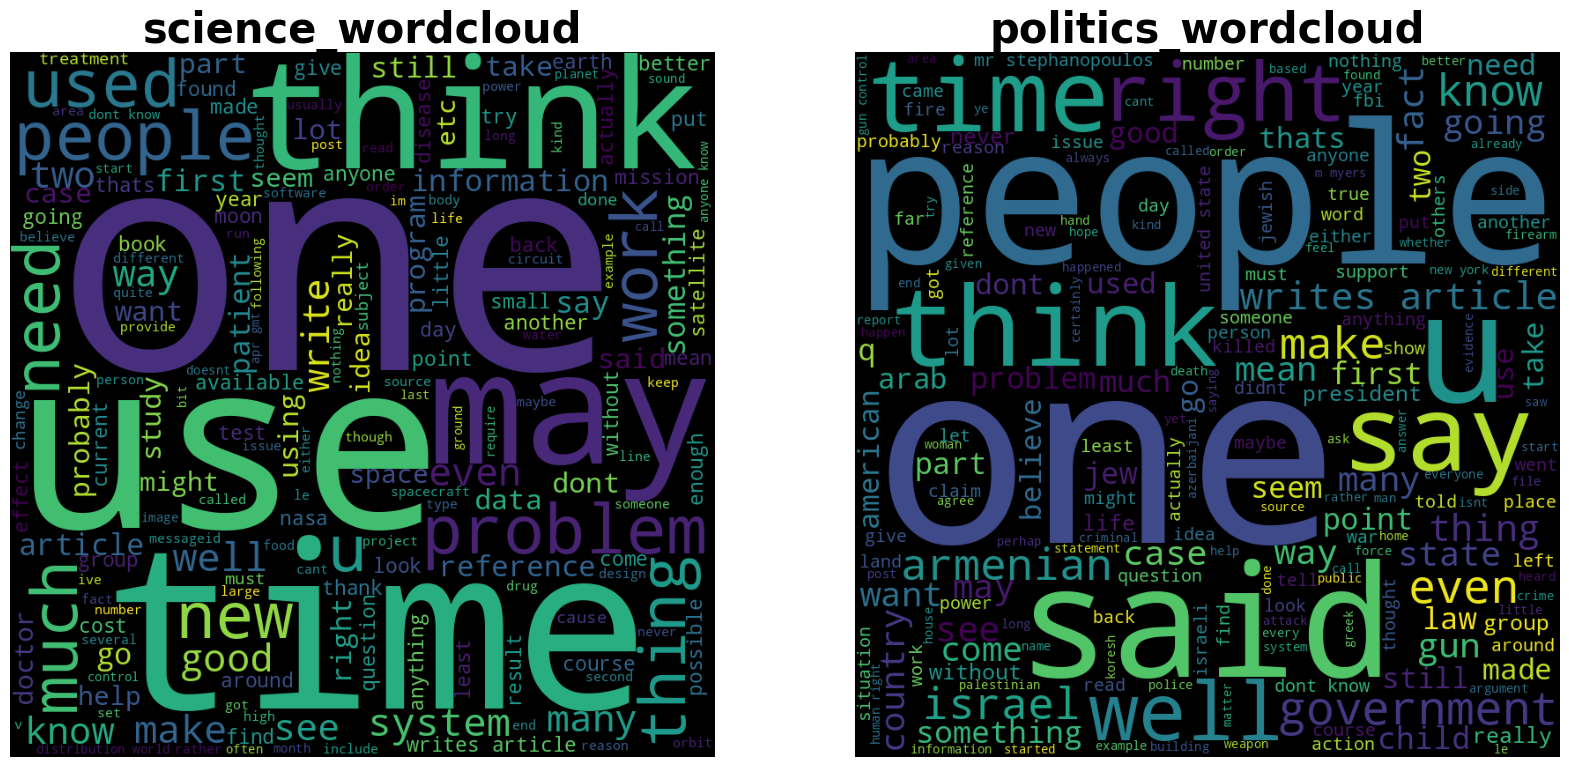

In [15]:
# Word cloud of words in remaning categories
science_text = df[df['Category'] == 'Science']['cleaned_content'].values
science_text = join_content(science_text)
politics_text = df[df['Category'] == 'Politics']['cleaned_content'].values
politics_text = join_content(politics_text)
fig, axos = plt.subplots(1, 2, figsize= (20,16), facecolor= None)
science_wordcloud = wordcloud(science_text)
politics_wordcloud = wordcloud(politics_text)
axos[0].imshow(science_wordcloud)
axos[0].set_title('science_wordcloud', fontweight="bold", size=30)
axos[0].axis("off")
axos[1].imshow(politics_wordcloud)
axos[1].set_title('politics_wordcloud', fontweight="bold", size=30)
axos[1].axis("off")

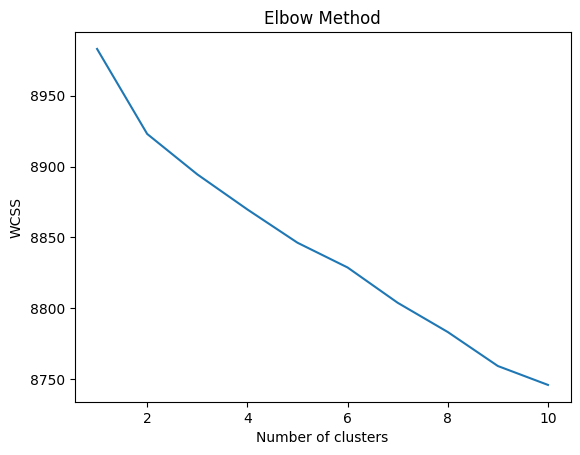

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


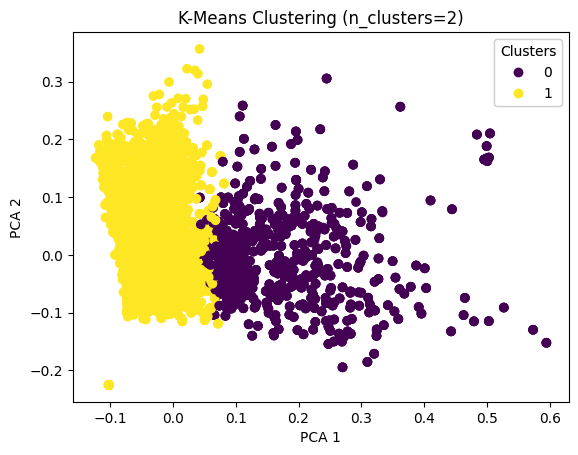

In [16]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load data
emails = data_frame_cleaned['cleaned_content']# list of email texts

# Vectorize emails
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(emails)

# Find optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,
                    n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
fig, ax = plt.subplots()
ax.plot(range(1, 11), wcss)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
ax.set_title('Elbow Method')
plt.show()

# Cluster emails using optimal number of clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

# Visualize clusters using PCA
pca = PCA(n_components=2).fit(X.toarray())
X_pca = pca.transform(X.toarray())
labels = kmeans.predict(X)

# Plot scatter plot with legend
fig, ax = plt.subplots()
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_title('K-Means Clustering (n_clusters=2)')
legend = ax.legend(*scatter.legend_elements(),
                   title='Clusters', loc='best')
ax.add_artist(legend)
plt.show()

In [99]:
# Balancing the dataset

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


category_counts = {}

# Loop over each row and update the count for the corresponding category
for index, row in df.iterrows():
    category = row['Category']
    if category in category_counts:
        category_counts[category] += 1
    else:
        category_counts[category] = 1

# Find the minimum count value from the dictionary
min_count = min(category_counts.values())

balanced_df = pd.DataFrame(columns=df.columns)

# Loop over each category and select the first n rows
for category in df['Category'].unique():
    category_rows = df.loc[df['Category'] == category][:min_count]
    balanced_df = pd.concat([balanced_df, category_rows])

# Shuffle the rows of the new DataFrame
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)

# Split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_df['cleaned_content'], balanced_df['Category'], test_size=0.2, random_state=42)

# Transform the text data into numerical features using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Use the transformed features as input to a machine learning model
# For example, a logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_vec, y_train)
y_predicted_lr= clf.predict(X_test_vec)
score = clf.score(X_test_vec, y_test)
print('Accuracy:', score)


Accuracy: 0.9716494845360825


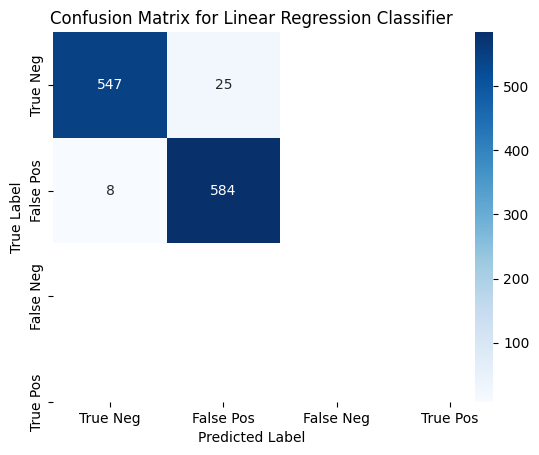

In [110]:
from sklearn.metrics import confusion_matrix

# Create confusion matrices for the two classifiers
cm = confusion_matrix(y_test, y_predicted_lr)

# # Define the labels for the matrix
# labels = ['True Neg','False Pos','False Neg','True Pos']

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Set the title and axis labels
plt.title('Confusion Matrix for Linear Regression Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

In [100]:
from sklearn.metrics import classification_report

print("Logisitic Regression")
print(classification_report(y_test, y_predicted_lr , target_names = ['Science', 'Politics']))
print("-"*20)

Logisitic Regression
              precision    recall  f1-score   support

     Science       0.99      0.96      0.97       572
    Politics       0.96      0.99      0.97       592

    accuracy                           0.97      1164
   macro avg       0.97      0.97      0.97      1164
weighted avg       0.97      0.97      0.97      1164

--------------------


In [101]:
# Training the Decision Tree

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train_vec, y_train);
y_predicted_dt= clf.predict(X_test_vec)
score = clf.score(X_test_vec, y_test)
print('Accuracy:', score)


Accuracy: 0.8754295532646048


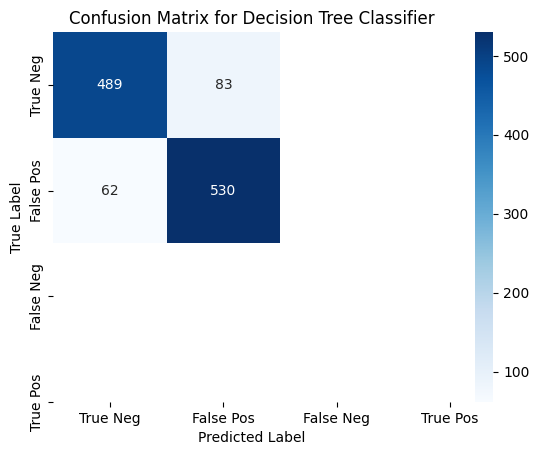

In [106]:
from sklearn.metrics import confusion_matrix

# Create confusion matrices for the two classifiers
cm = confusion_matrix(y_test, y_predicted_dt)

# Define the labels for the matrix
labels = ['True Neg','False Pos','False Neg','True Pos']

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Set the title and axis labels
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

In [108]:
print("Decision Tree Classifier")
print(classification_report(y_test, y_predicted_dt, target_names = ['Science', 'Politics']))
print("-"*20)

Decision Tree Classifier
              precision    recall  f1-score   support

     Science       0.89      0.85      0.87       572
    Politics       0.86      0.90      0.88       592

    accuracy                           0.88      1164
   macro avg       0.88      0.88      0.88      1164
weighted avg       0.88      0.88      0.88      1164

--------------------


In [85]:
y_predict_dt2= y_predicted_dt;

In [76]:
# Training the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_vec, y_train);
y_predicted_knn= clf.predict(X_test_vec)
score = neigh.score(X_test_vec, y_test)
print("Accuracy for KNN Classifier",score)

Accuracy for KNN Classifier 0.6391752577319587


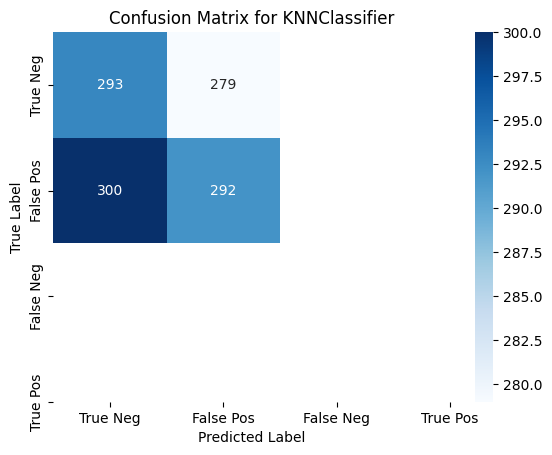

In [111]:
from sklearn.metrics import confusion_matrix

# Create confusion matrices for the two classifiers
cm = confusion_matrix(y_test,y_predicted_knn)

# Define the labels for the matrix
labels = ['True Neg','False Pos','False Neg','True Pos']

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Set the title and axis labels
plt.title('Confusion Matrix for KNNClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

In [123]:
print("KNN Classifier")
print(classification_report(y_test, y_predicted_dt, target_names = ['Science', 'Politics']))
print("-"*20)

KNN Classifier
              precision    recall  f1-score   support

     Science       0.89      0.85      0.87       572
    Politics       0.86      0.90      0.88       592

    accuracy                           0.88      1164
   macro avg       0.88      0.88      0.88      1164
weighted avg       0.88      0.88      0.88      1164

--------------------


In [86]:
y_predicted_knn2= y_predicted_knn;

In [114]:
# Training the XGBoost classifier
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
# Define the XGBoost model
model = xgb.XGBClassifier()

# # create label encoder object
le = LabelEncoder()


# fit and transform the target variable
y_train_encoded = le.fit_transform(y_train)

# Train the model
model.fit(X_train_vec, y_train_encoded)

# Predict on the test set
y_pred_xg = model.predict(X_test_vec)
y_pred_encoded,y_test_encoded = le.fit_transform(y_pred_xg),le.fit_transform(y_test)

# Evaluate the model
acc = accuracy_score(y_test_encoded, y_pred_encoded)

print("XgBoost Accuracy: ", acc)

XgBoost Accuracy:  0.9390034364261168


In [117]:
print("XGBoost")
print(classification_report(y_test, y_predicted_dt, target_names = ['Science', 'Politics']))
print("-"*20)

XGBoost
              precision    recall  f1-score   support

     Science       0.89      0.85      0.87       572
    Politics       0.86      0.90      0.88       592

    accuracy                           0.88      1164
   macro avg       0.88      0.88      0.88      1164
weighted avg       0.88      0.88      0.88      1164

--------------------


In [88]:
y_predicted_xg2=y_pred_xg;

In [22]:
science_avg_email_length= len(science_text.split())/len(df[df["Category"]=="Science"])

print("Average word count in science email is: ",int(science_avg_email_length))
politics_avg_email_length= len(politics_text.split())/len(df[df["Category"]=="Politics"])
print("Average word count in politics email is: ",int(politics_avg_email_length))


Average word count in science email is:  134
Average word count in politics email is:  204


In [79]:
# import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

# create three decision tree classifiers with different max depths
tree1 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree2 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree3 = DecisionTreeClassifier(max_depth=4, random_state=42)

# create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# create an ensemble voting classifier
ensemble = VotingClassifier(
    estimators=[('tree1', tree1), ('tree2', tree2), ('tree3', tree3), ('rf', rf)],
    voting='hard'
)

# fit the ensemble model on training data
ensemble.fit(X_train_vec, y_train)

# predict on test data using ensemble model
y_pred_ensemble = ensemble.predict(X_test_vec)
y_pred_ensemble2=y_pred_ensemble
# evaluate the accuracy of the ensemble model
accuracy = accuracy_score(y_test, y_pred_ensemble)
print("Accuracy:", accuracy)


Accuracy: 0.7345360824742269


In [122]:
print("ENSEMBLE")
print(classification_report(y_test, y_predicted_dt, target_names = ['Science', 'Politics']))
print("-"*20)

ENSEMBLE
              precision    recall  f1-score   support

     Science       0.89      0.85      0.87       572
    Politics       0.86      0.90      0.88       592

    accuracy                           0.88      1164
   macro avg       0.88      0.88      0.88      1164
weighted avg       0.88      0.88      0.88      1164

--------------------


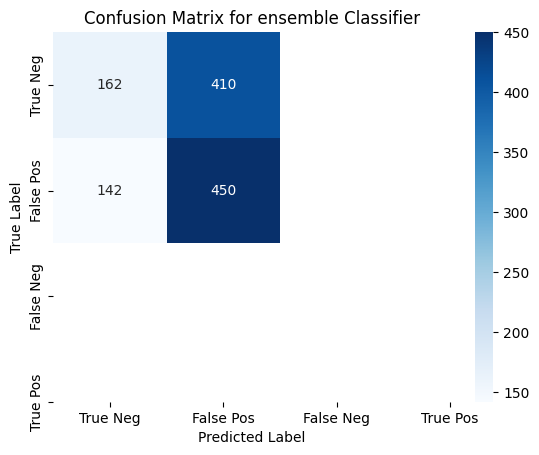

In [119]:
from sklearn.metrics import confusion_matrix

# Create confusion matrices for the two classifiers
cm = confusion_matrix(y_test,y_pred_ensemble2)

# Define the labels for the matrix
labels = ['True Neg','False Pos','False Neg','True Pos']

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Set the title and axis labels
plt.title('Confusion Matrix for ensemble Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

In [80]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import regex
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

en_stopwords = stopwords.words('english')
word_lemmatizer = WordNetLemmatizer()
# df1=pd.read_csv("combine.csv")

def clean_contents_w_stopwords(contents):
    tokenized_word = word_tokenize(str(contents).replace("\n", "").replace("\\", "").replace(">", "").strip())
    tokenized_word_w_stopwords = []
    for word in tokenized_word:
        word = regex.sub(u'\p{^Latin}', u'', word.lower())
        if len(word) > 3 and word.strip().lower() not in en_stopwords:
            word = word_lemmatizer.lemmatize(word)
            tokenized_word_w_stopwords.append(word)
    tokenized_word_w_stopwords = " ".join(tokenized_word_w_stopwords)
    return tokenized_word_w_stopwords

df1 = pd.read_csv('/content/combine.csv')

df1['tokenized_word_w_stopwords'] = df1['Content'].apply(lambda x: clean_contents_w_stopwords(x))

df1 = df1.sample(frac=1, random_state=42)
minimum_count = df1.groupby(by=['Category']).count()['Content'].min()
politics_df = df1.loc[df1['Category'] == 'Politics'][:minimum_count]
crime_df = df1.loc[df1['Category'] == 'Crime'][:minimum_count]
entertainment_df = df1.loc[df1['Category'] == 'Entertainment'][:minimum_count]
science_df = df1.loc[df1['Category'] == 'Science'][:minimum_count]
normal_dist_df = pd.concat([politics_df, crime_df, entertainment_df, science_df])
le = LabelEncoder()
normal_dist_df['Classification'] = le.fit_transform(normal_dist_df['Category'])
tfidf = TfidfVectorizer(lowercase=False)
train_vec = tfidf.fit_transform(normal_dist_df['tokenized_word_w_stopwords'])
print(train_vec.shape)


(4204, 36240)


In [81]:
normal_dist_df['Classification']=df1['Category']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(train_vec, normal_dist_df['Classification'], stratify=normal_dist_df['Classification'], test_size=0.2)

In [83]:
from sklearn.svm import SVC
# Train a support vector machine classifier
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

Accuracy: 0.4637336504161712


In [23]:
science_wordcloud1 = wordcloud1(science_text)
print(science_wordcloud1)
print(science_wordcloud1[0])

my_list= science_wordcloud1[0:15] # create a new list containing only the first 7 elements



# create a dictionary from the list of tuples using a dictionary comprehension
my_dict = {key: value for key, value in my_list}

# print the resulting dictionary
print(my_dict)

value = my_dict["one"]
print(value)

del my_dict["one"]

# define the factor to multiply
factor = 1/value

# multiply each value by the factor using a dictionary comprehension
new_dict = {key: value * factor for key, value in my_dict.items()}



# print the original and updated dictionaries
print(f"Original dictionary: {my_dict}")
print("\n")
print("\n")
print(f"dictionary with relative frequency of words from science: {new_dict}")

print("\n")
print("\n")


crime_wordcloud1 = wordcloud1(crime_text)
print(crime_wordcloud1)
print(crime_wordcloud1[0])

my_list= crime_wordcloud1[0:15] # create a new list containing only the first 7 elements



# create a dictionary from the list of tuples using a dictionary comprehension
my_dict1 = {key: value for key, value in my_list}

# print the resulting dictionary
print(my_dict1)

value = my_dict1["one"]
print(value)
del my_dict1["one"]

# define the factor to multiply
factor = 1/value
# multiply each value by the factor using a dictionary comprehension
new_dict = {key: value * factor for key, value in my_dict1.items()}

# print the original and updated dictionaries
print(f"Original dictionary: {my_dict1}")
print("\n")
print("\n")
print(f"dictionary with relative frequency of words from crime: {new_dict}")


print("\n")
print("\n")

politics_wordcloud1 = wordcloud1(politics_text)
print(politics_wordcloud1)
print(politics_wordcloud1[0])

my_list= politics_wordcloud1[0:15] # create a new list containing only the first 7 elements



# create a dictionary from the list of tuples using a dictionary comprehension
my_dict = {key: value for key, value in my_list}

# print the resulting dictionary
print(my_dict)
value = my_dict["one"]
print(value)
del my_dict["one"]

# define the factor to multiply
factor = 1/value

# multiply each value by the factor using a dictionary comprehension
new_dict = {key: value * factor for key, value in my_dict.items()}

# print the original and updated dictionaries

print(f" dictionary of relative frequencies of crime words: {new_dict}")

print("\n")
print("\n")

entertainment_wordcloud1 = wordcloud1(entertainment_text)
print(entertainment_wordcloud1)
print(entertainment_wordcloud1[0])

my_list= entertainment_wordcloud1[0:15] # create a new list containing only the first 7 elements



# create a dictionary from the list of tuples using a dictionary comprehension
my_dict = {key: value for key, value in my_list}

# print the resulting dictionary
print(my_dict)

value = my_dict["one"]
print(value)
del my_dict["one"]

# define the factor to multiply
factor = 1/value

# multiply each value by the factor using a dictionary comprehension
new_dict = {key: value * factor for key, value in my_dict.items()}

print("\n")
print(f" dictionary with relative frequency of words of entertainment: {new_dict}")

[('one', 1845), ('use', 949), ('time', 877), ('may', 738), ('think', 710), ('problem', 662), ('people', 642), ('used', 616), ('work', 595), ('u', 587), ('much', 583), ('thing', 580), ('need', 576), ('new', 571), ('system', 569), ('well', 562), ('good', 542), ('make', 541), ('even', 530), ('write', 508), ('many', 506), ('know', 489), ('way', 479), ('two', 476), ('see', 473), ('information', 470), ('something', 469), ('article', 461), ('say', 460), ('first', 459), ('go', 446), ('reference', 423), ('patient', 419), ('still', 410), ('take', 397), ('dont', 394), ('program', 394), ('data', 392), ('case', 387), ('part', 379), ('using', 374), ('right', 365), ('probably', 365), ('study', 357), ('said', 357), ('want', 351), ('lot', 346), ('might', 344), ('seem', 344), ('space', 343), ('help', 337), ('idea', 335), ('etc', 334), ('really', 332), ('doctor', 332), ('writes article', 325), ('back', 322), ('available', 321), ('going', 312), ('look', 312), ('course', 309), ('earth', 307), ('cost', 305)

In [43]:
df_decision_tree = df

# define a function to count the frequency of the word "key" in a text
def count_key(text):
    return text.count('think')

# apply the function to the "tokenized_word_w_stopwords" column and store the result in a new column called "key_count"
df_decision_tree['think_count'] = df_decision_tree['cleaned_content'].apply(count_key)
print("  \n")




# define a function to count the frequency of the word "key" in a text
def count_key(text):
    return text.count('government')

# apply the function to the "tokenized_word_w_stopwords" column and store the result in a new column called "key_count"
df_decision_tree['government_count'] = df_decision_tree['cleaned_content'].apply(count_key)
print("  \n")



# define a function to count the frequency of the word "key" in a text
def count_key(text):
    return text.count('key')

# apply the function to the "tokenized_word_w_stopwords" column and store the result in a new column called "key_count"
df_decision_tree['key_count'] = df_decision_tree['cleaned_content'].apply(count_key)
print("  \n")






# define a function to count the frequency of the word "key" in a text
def count_key(text):
    return text.count('israel')

# apply the function to the "tokenized_word_w_stopwords" column and store the result in a new column called "key_count"
df_decision_tree['israel_count'] = df_decision_tree['cleaned_content'].apply(count_key)
print("  \n")



# define a function to count the frequency of the word "key" in a text
def count_key(text):
    return text.count('people')

# apply the function to the "tokenized_word_w_stopwords" column and store the result in a new column called "key_count"
df_decision_tree['people_count'] = df_decision_tree['cleaned_content'].apply(count_key)
print("  \n")



# define a function to count the frequency of the word "key" in a text
def count_key(text):
    return text.count('system')

# apply the function to the "tokenized_word_w_stopwords" column and store the result in a new column called "key_count"
df_decision_tree['system_count'] = df_decision_tree['cleaned_content'].apply(count_key)
print("  \n")



# define a function to count the frequency of the word "key" in a text
def count_key(text):
    return text.count('time')

# apply the function to the "tokenized_word_w_stopwords" column and store the result in a new column called "key_count"
df_decision_tree['time_count'] = df_decision_tree['cleaned_content'].apply(count_key)
print("  \n")


# define a function to count the frequency of the word "key" in a text
def count_key(text):
    return text.count('know')

# apply the function to the "tokenized_word_w_stopwords" column and store the result in a new column called "key_count"
df_decision_tree['know_count'] = df_decision_tree['cleaned_content'].apply(count_key)
print("  \n")

# define a function to count the frequency of the word "key" in a text
def count_key(text):
    return text.count('make')

# apply the function to the "tokenized_word_w_stopwords" column and store the result in a new column called "key_count"
df_decision_tree['make_count'] = df_decision_tree['cleaned_content'].apply(count_key)
print("  \n")

df_decision_tree = df_decision_tree.drop(['ID',  'Content', 'cleaned_content'], axis=1)

print(df_decision_tree)

  

  

  

  

  

  

  

  

  

      Category  think_count  government_count  key_count  israel_count  \
2153  Politics            1                 0          0             0   
2154  Politics            1                 0          0             0   
2155  Politics            0                 1          0             0   
2156  Politics            0                 0          0             3   
2157  Politics            0                10          0             0   
...        ...          ...               ...        ...           ...   
9148   Science            0                 0          0             0   
9149   Science            1                 0          0             0   
9150   Science            0                 0          0             0   
9151   Science            0                 0          0             0   
9152   Science            0                 0          0             0   

      people_count  system_count  time_count  know_count  make_count  
2153

In [44]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Specify your features and target variable
X = df_decision_tree[['key_count','think_count', 'government_count', 'israel_count', 'people_count','system_count']]
y = df_decision_tree['Category']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize your decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of your model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7151720248166948
